# Unsupervised Machine Learning

## Dimensionality Reduction
pengurangan dimensi sebuah dataset
- PCA, Principal Component Analysis

## Clustering
mengelompokkan data jadi bbrp kelompok
- K-Means Clustering

---
# PCA

misal data yang kita punya mempunyai 1 fitur, luas rumah. maka data ini adalah 1 dimensi.

jika data kita punya 2 fitur, luas rumah dan luas bangunan. maka data ini berbentuk 2 dimensi.

bagaimana kalau kita punya 3 fitur, luas rumah, luas bangunan, dan tinggi rumah. maka data berbentuk 3 dimensi

dan seterusnya

misalkan kita mau membuat visualisasi data yang punya banyak fitur, seperti data hasil tes darah, fitur nya ada banyak, lebih dari dua, sehingga tidak bisa kita plot ke sebuah grafik 2 dimensi. kita bisa gunakan teknik PCA untuk mengurangi dimensi sampai jadi 2 dimensi sebelum kita buat grafik visualisasinya. fitur tidak kita kurangi, hanya dimensinya.

contoh aplikasi PCA dengan data kanker payudara dari sklearn:

In [58]:
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import pickle

In [2]:
data_bc = load_breast_cancer()

In [3]:
df_bc = pd.DataFrame(data = data_bc.data, columns = data_bc.feature_names)
target = data_bc.target

display(df_bc)
print(target, len(target))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [4]:
print(data_bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
data_bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# prep data menggunakan standard scaler
scaler = StandardScaler()
features = scaler.fit_transform(df_bc)
pd.DataFrame(data = features, columns=data_bc.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [7]:
# buat dan latih model
model_pca = PCA(n_components=2)
df_pc = pd.DataFrame(data = model_pca.fit_transform(features), columns=["PC1", "PC2"])
df_pc

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [8]:
# buat dan latih model
n=3
model_pca = PCA(n_components=n)

judul_kolom = []
for i in range(n):
    judul_kolom.append("PC" + str(i+1))
    
df_pc = pd.DataFrame(data = model_pca.fit_transform(features), columns=judul_kolom)
df_pc

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123181
1,2.387802,-3.768172,-0.529297
2,5.733896,-1.075174,-0.551743
3,7.122953,10.275589,-3.232796
4,3.935302,-1.948072,1.389765
...,...,...,...
564,6.439315,-3.576817,2.459489
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562735
567,10.374794,1.672010,-1.877026


In [9]:
# PC1 gabungan dari fiturnya seperti apa?
pd.DataFrame(data = model_pca.components_, columns=data_bc.feature_names, index=judul_kolom)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236075,-0.173057,-0.170344,-0.271313,-0.232791


In [10]:
pd.DataFrame(data = model_pca.components_, columns=data_bc.feature_names, index=judul_kolom).T

,PC1,PC2,PC3
mean radius,0.218902,-0.233857,-0.008531
mean texture,0.103725,-0.059706,0.064550
mean perimeter,0.227537,-0.215181,-0.009314
mean area,0.220995,-0.231077,0.028700
mean smoothness,0.142590,0.186113,-0.104292
mean compactness,0.239285,0.151892,-0.074092
mean concavity,0.258400,0.060165,0.002734
mean concave points,0.260854,-0.034768,-0.025564
mean symmetry,0.138167,0.190349,-0.040240
mean fractal dimension,0.064363,0.366575,-0.022574


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

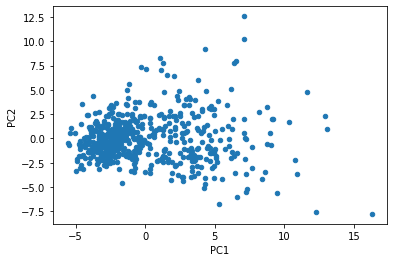

In [11]:
df_pc.plot(kind="scatter", x="PC1", y="PC2")

In [12]:
# kumpulin fitur dan target di satu dataframe df_breat
df_breast = df_pc.copy()
df_breast["target"] = target
df_breast["target"] = df_breast["target"].replace({0:data_bc.target_names[0], 1:data_bc.target_names[1]})
df_breast

,PC1,PC2,PC3,target
0,9.192837,1.948583,-1.123181,malignant
1,2.387802,-3.768172,-0.529297,malignant
2,5.733896,-1.075174,-0.551743,malignant
3,7.122953,10.275589,-3.232796,malignant
4,3.935302,-1.948072,1.389765,malignant
...,...,...,...,...
564,6.439315,-3.576817,2.459489,malignant
565,3.793382,-3.584048,2.088476,malignant
566,1.256179,-1.902297,0.562735,malignant
567,10.374794,1.672010,-1.877026,malignant


In [13]:
# pisahin data menurut target
df_benign = df_breast[df_breast['target'] == 'benign']
df_malignant = df_breast[df_breast['target'] == 'malignant']

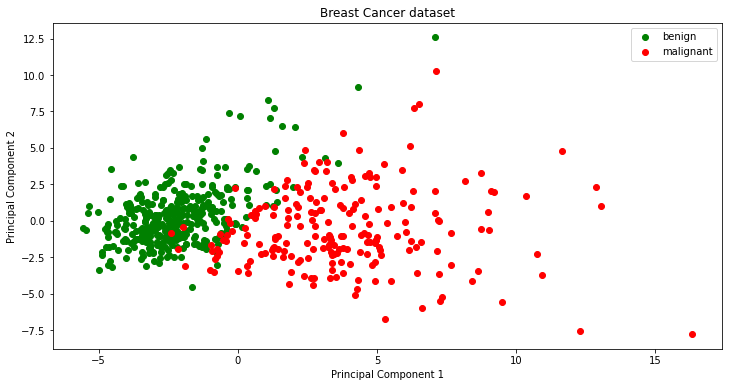

In [14]:
# visualisasikan dengan PC1 di x-axis dan PC2 di y-axis

plt.figure(figsize=(12,6))

plt.scatter(data=df_benign, x="PC1", y="PC2", color="green")
plt.scatter(data=df_malignant, x="PC1", y="PC2", color="red")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer dataset")

plt.legend(["benign", "malignant"])

plt.show()

In [15]:
# seberapa besar penyebaran data di dataset kita dijelaskan oleh sebuah Principal Component
pd.DataFrame(data = model_pca.explained_variance_, index=judul_kolom, columns=["Explained Variance"])

,Explained Variance
PC1,13.304991
PC2,5.701375
PC3,2.822910


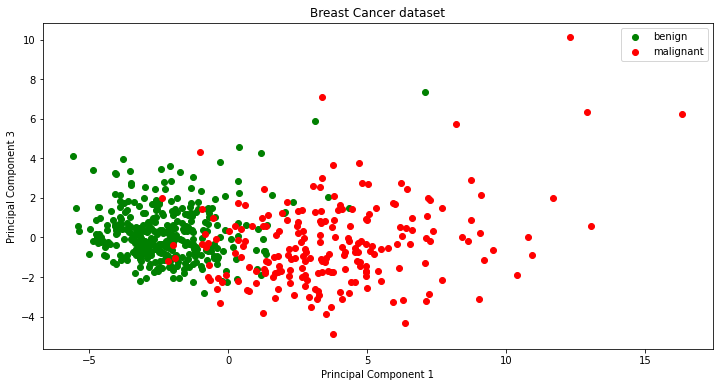

In [16]:
# visualisasikan dengan PC1 di x-axis dan PC2 di y-axis

plt.figure(figsize=(12,6))

plt.scatter(data=df_benign, x="PC1", y="PC3", color="green")
plt.scatter(data=df_malignant, x="PC1", y="PC3", color="red")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.title("Breast Cancer dataset")

plt.legend(["benign", "malignant"])

plt.show()

# Clustering

memisahkan data di sebuah dataset menjadi beberapa kelompok

contoh: kita punya data customer banyak, kita mau tau apakah ada tipe2 customer tertentu. mungkin ada big buyer hobi beli susu aja, yang lain sedikit2, mungkin ada tipe buyer yang beli nya kebanyakan fresh goods seperti daging sayuran telur, 

contoh: misalnya kita dapat email sampai ribuan email, bagaimana cara membagi email2 ini menjadi beberapa kelompok misalkan: personal, subscription, spam

# K-Means Clustering
1. bayangkan data kita di plot di sebuah graph
2. pilih k, jumlah cluster yang kita inginkan
3. bikin centroid (titik tengah) sebanyak k, jumlah cluster yang kita pilih tadi
4. semua titik data yang paling dekat dengan centroid tertentu masuk cluster centroid tersebut
5. hitung ulang posisi centroid setiap cluster, balik ke step 4
6. step 4 dan 5 akan terus berulang sampai 1 dari 3 kemungkinan terjadi:
    - posisi centroid tidak berubah setelah dihitung ulang
    - tidak ada titik data yang pindah cluster walaupun centroid sudah dihitung ulang
    - kita mencapai max limit iteration, pilihan kita sendiri max limitnya berapa

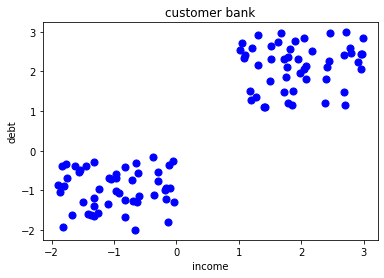

In [17]:
# siapkan data
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.xlabel("income")
plt.ylabel("debt")
plt.title("customer bank")
plt.show()

In [18]:
pd.DataFrame(data=X, columns=["income", "debt"])

,income,debt
0,-1.814337,-1.934235
1,-1.266539,-1.565190
2,-1.248164,-0.960130
3,-1.315287,-1.202524
4,-0.100552,-0.947678
...,...,...
95,1.722813,2.303963
96,1.025234,2.532362
97,1.101154,2.420633
98,1.177514,1.512650


In [19]:
# data prepartaion, exploration

In [20]:
# bikin model dan latih model
model_kmeans = KMeans() # kalau kita tidak pilih mau berapa k cluster nya, default nya ada 8 cluster
model_kmeans.fit(X)

KMeans()

In [21]:
# bikin prediksi untuk tau datanya masing2 masuk cluster yang mana
pd.Series(model_kmeans.predict(X)).value_counts()

3    18
1    15
4    14
0    12
6    11
5    11
7    10
2     9
dtype: int64

In [29]:
# 2 cluster saja
model_kmeans = KMeans(n_clusters=2) # kalau kita tidak pilih mau berapa k cluster nya, default nya ada 8 cluster
model_kmeans.fit(X)

KMeans(n_clusters=2)

In [30]:
pd.Series(model_kmeans.predict(X)).value_counts()

1    50
0    50
dtype: int64

In [31]:
df_dummy = pd.DataFrame(data=X, columns=["income", "debt"])
df_dummy["cluster"] = model_kmeans.predict(X)

df_dummy

,income,debt,cluster
0,-1.814337,-1.934235,1
1,-1.266539,-1.565190,1
2,-1.248164,-0.960130,1
3,-1.315287,-1.202524,1
4,-0.100552,-0.947678,1
...,...,...,...
95,1.722813,2.303963,0
96,1.025234,2.532362,0
97,1.101154,2.420633,0
98,1.177514,1.512650,0


In [32]:
# untuk tau lokasi centroid nya kita bisa minta cluster_centers_ dari model nya
centroids = model_kmeans.cluster_centers_
centroids

array([[ 1.95910319,  2.13763501],
       [-0.98200596, -0.96424499]])

Inertia 61.74182907992882
jumlah iteration 2


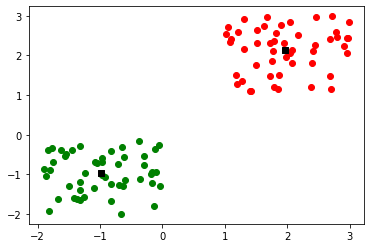

In [33]:
# visualisasikan hasil clustering data kita jadi 2 kelompok

kelompok0 = df_dummy[df_dummy["cluster"]==0]
kelompok1 = df_dummy[df_dummy["cluster"]==1]

plt.scatter(data=kelompok0, x="income", y="debt", color="red")
plt.scatter(data=kelompok1, x="income", y="debt", color="green")

plt.scatter(data=centroids[0], x=centroids[0,0], y=centroids[0,1], color="black", marker="s")
plt.scatter(data=centroids[1], x=centroids[1,0], y=centroids[1,1], color="black", marker="s")

print("Inertia", model_kmeans.inertia_)
print("jumlah iteration", model_kmeans.n_iter_)

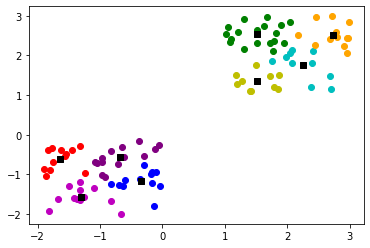

Inertia 14.932646680275832
jumlah iteration 5


In [34]:
# kalau mau coba bagi dari 2-8 cluster, dipisahnya seperti apa?
# ini contoh visual nya data kita dipisah jadi bbrp cluster
k=8
model_kmeans = KMeans(n_clusters=k)
model_kmeans.fit(X)

# print(pd.Series(model_kmeans.predict(X)).value_counts())

df_dummy = pd.DataFrame(data=X, columns=["income", "debt"])
df_dummy["cluster"] = model_kmeans.predict(X)

# display(df_dummy)

centroids = model_kmeans.cluster_centers_
# print(centroids)

# visualisasikan hasil clustering data kita jadi 2 kelompok

colors = ['b','g','r','c','m','y','purple','orange']

for n in range(k):
    kelompok = df_dummy[df_dummy["cluster"]==n]
    plt.scatter(data=kelompok, x="income", y="debt", color=colors[n])
    plt.scatter(data=centroids[n], x=centroids[n,0], y=centroids[n,1], color="black", marker="s")
    
plt.show()

print("Inertia", model_kmeans.inertia_)
print("jumlah iteration", model_kmeans.n_iter_)

# Study Case - Clustering menggunakan data asli
kita akan gunakan file data `Wholesale customers data.csv` untuk mencoba teknik Clustering, kita akan baca dari customer2 wholesale kita ada berapa kelompok dan masing2 kelompok apa miripnya satu sama lain

In [36]:
# siapin data
df_wholesale = pd.read_csv("dataset/Wholesale customers data.csv")
df_wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [37]:
# rapiin data
df_wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [41]:
# explore data
for col in df_wholesale.columns:
    print("Kolom", col)
    print(df_wholesale[col].value_counts())

Kolom Channel
1    298
2    142
Name: Channel, dtype: int64
Kolom Region
3    316
1     77
2     47
Name: Region, dtype: int64
Kolom Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: Fresh, Length: 433, dtype: int64
Kolom Milk
3045     2
1610     2
5139     2
2428     2
3587     2
        ..
1596     1
7152     1
13252    1
4280     1
1698     1
Name: Milk, Length: 421, dtype: int64
Kolom Grocery
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: Grocery, Length: 430, dtype: int64
Kolom Frozen
2540    2
425     2
1285    2
4324    2
1619    2
       ..
2995    1
321     1
2279    1
825     1
65      1
Name: Frozen, Length: 426, dtype: int64
Kolom Detergents_Paper
118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: Detergents_Paper, Length: 417, dtype: int64
Kolom Delicassen
3       4
834 

In [42]:
# buat model clustering
model_w = KMeans(n_clusters=8)
model_w.fit(df_wholesale)

KMeans()

In [43]:
# kasih lihat hasil pembagian cluster
df_wholesale_clustered = df_wholesale.copy()
df_wholesale_clustered["cluster"] = model_w.predict(df_wholesale)
df_wholesale_clustered

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,5
2,2,3,6353,8808,7684,2405,3516,7844,5
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,3


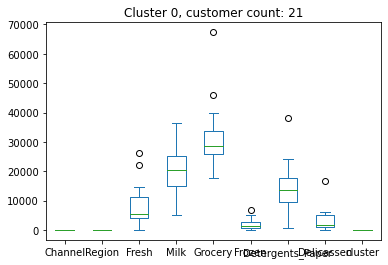

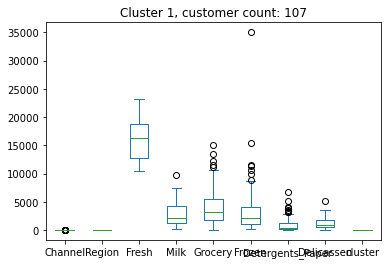

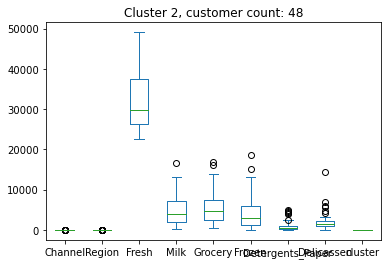

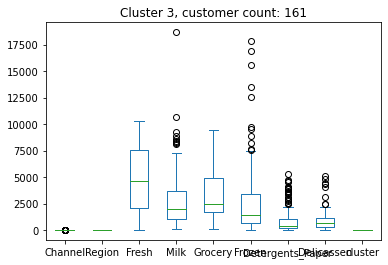

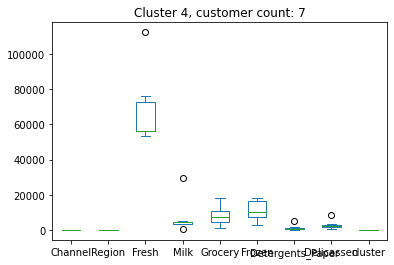

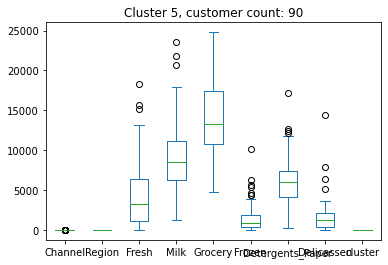

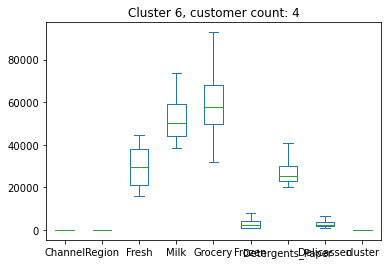

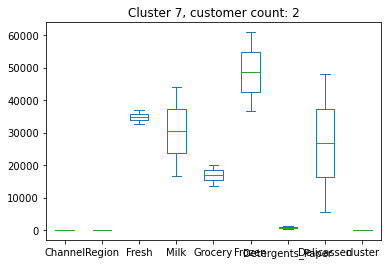

In [49]:
for n in range(8):
    kelompok = df_wholesale_clustered[df_wholesale_clustered["cluster"]==n]
    # display(kelompok.describe())
    kelompok.plot(kind="box")
    plt.title("Cluster " + str(n) + ", customer count: " + str(len(kelompok)))
    
plt.show()

Text(0, 0.5, 'Inertia')

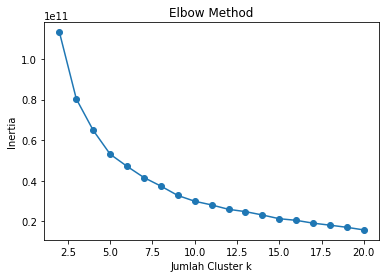

In [53]:
# kita gak yakin apakah benar 8 kelompok itu sudah memisahkan datanya dengan baik
# untuk tes kira2 jumlah cluster berapa yang paling ok, kita bisa gunakab elbow method

# plot jumlah cluster dengan intertia di sebuah graph

# misal kita mau tes jumlah cluster 2 - 20

inertia_list = []
jumlah_iter_list = []
for k in range(2, 21):
    model_w = KMeans(n_clusters=k).fit(df_wholesale)
    inertia_list.append(model_w.inertia_)
    jumlah_iter_list.append(model_w.n_iter_)

plt.plot(range(2,21), inertia_list, marker="o")
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster k")
plt.ylabel("Inertia")

Text(0, 0.5, 'no. of iterations')

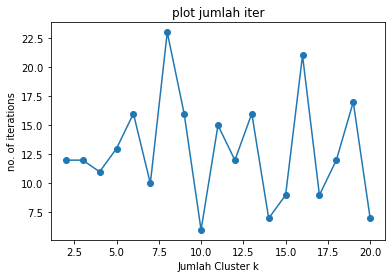

In [54]:
plt.plot(range(2,21), jumlah_iter_list, marker="o")
plt.title("plot jumlah iter")
plt.xlabel("Jumlah Cluster k")
plt.ylabel("no. of iterations")

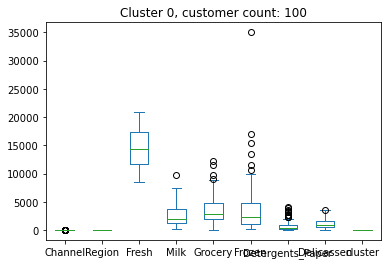

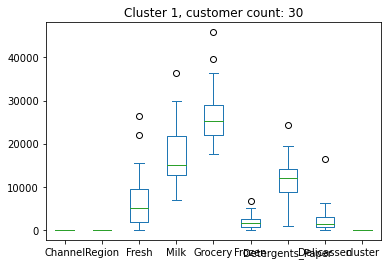

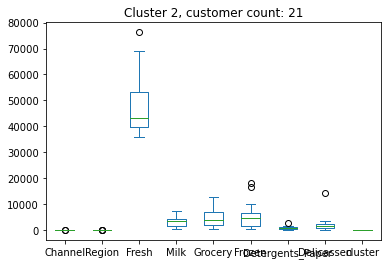

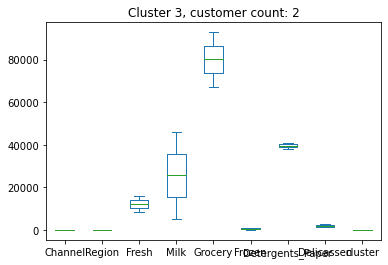

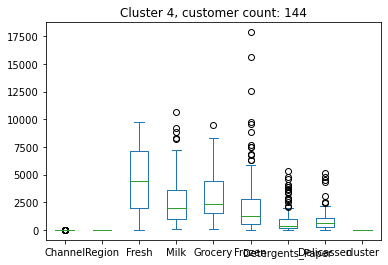

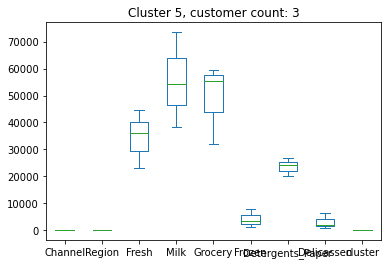

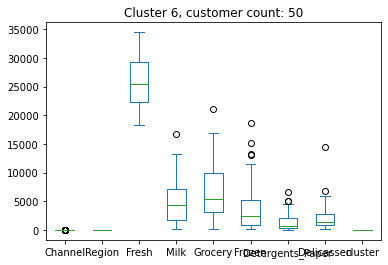

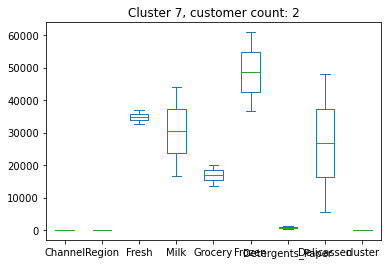

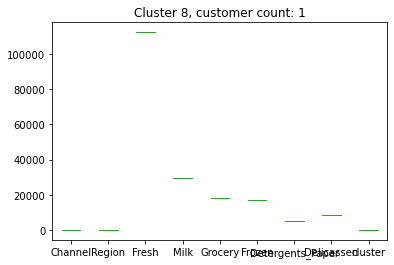

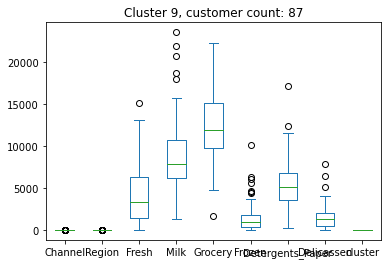

In [56]:
# setelah membuat elbow method, kita pilih mau berapa cluster kira2 yang optimal

k = 10
model_w = KMeans(n_clusters=k)
model_w.fit(df_wholesale)

df_wholesale_clustered = df_wholesale.copy()
df_wholesale_clustered["cluster"] = model_w.predict(df_wholesale)
# df_wholesale_clustered

for n in range(k):
    kelompok = df_wholesale_clustered[df_wholesale_clustered["cluster"]==n]
    # display(kelompok.describe())
    kelompok.plot(kind="box")
    plt.title("Cluster " + str(n) + ", customer count: " + str(len(kelompok)))
    
plt.show()

# Pickle untuk save model ke file terpisah
model yang sudah kita latih bisa kita save ke file terpisah pakai bantuan package pickle

In [59]:
# contoh model KMeans() yang barusan kita buat di save

pickle.dump(model_w, open('wholesale_cluster.pkl', 'wb'))
